In [13]:
# Google drive data links
protein_id = "1j-uTZm77Xfw91AMTFxfRVY0Cq1er98kB"
kcal_id = "1wisWTD_nKcu2jvPDZG4-1XVzb3UPg2CF"
fat_id = "1X8gK6CoGRqM8KIi9aKYMWbVgGsL60ZmW"
quantity_id = "1KBqJe3AzOlGoina3aWiNaUGT5f02EILZ"

url_protein = f"https://drive.google.com/uc?id={protein_id}"
url_kcal = f"https://drive.google.com/uc?id={kcal_id}"
url_fat = f"https://drive.google.com/uc?id={fat_id}"
url_quantity = f"https://drive.google.com/uc?id={quantity_id}"

In [2]:
import pandas as pd

### Data calculations

All data is calculated as a percentage of total intake amount

In [14]:
protein = pd.read_csv(url_protein)
kcal    = pd.read_csv(url_kcal)
fat = pd.read_csv(url_fat)
quantity = pd.read_csv(url_quantity)

In [6]:
# Convert strings in undernourished to ints
protein["Undernourished"].replace("<2.5", 2.5, inplace=True)
protein["Undernourished"] = protein["Undernourished"].astype(float)

In [7]:
from sklearn.impute import KNNImputer

In [11]:
#impute missing data
def impute_missing(df):
    #transform data from object variable to numerical variable
    df['Undernourished'] = df['Undernourished'].map(lambda x: '2.4' if x == '<2.5' else x).astype('float64')

    col = list(df.columns)
    col.remove('Unit (all except Population)') #remove '%' unit
    col.remove('Country') #object variable
    # nan_col = [c for c in col if df[c].isnull().sum() > 0]
    # not_nan_col = [c for c in col if c not in nan_col]


    imputer = KNNImputer(n_neighbors=3)
    imp_data = imputer.fit_transform(df[col])
    new = pd.DataFrame(imp_data, columns = col)

    return pd.concat([df[['Country']], new], axis=1) #concat 'Country' to data frame then return

In [15]:
fat = impute_missing(fat)
quantity = impute_missing(quantity)
kcal = impute_missing(kcal)
protein = impute_missing(protein)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\gympr\AppData\Local\Temp\ipykernel_9820\1038608319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Confirmed', ascending=False, inplace=True)


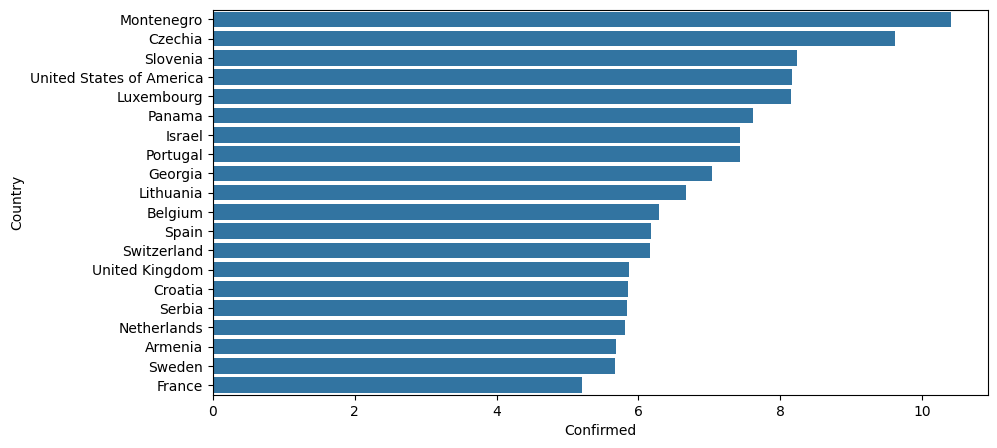

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

df = fat[['Country', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
df.sort_values(by='Confirmed', ascending=False, inplace=True)
sns.barplot(x="Confirmed", y="Country", data=df[:20]);